In [94]:
print("""\
# *************************************************************************** #
# *************************************************************************** #
# TP8 : PRIMALITE DES ENTIERS                                                 #
# *************************************************************************** #
# *************************************************************************** #
""")

# CONSIGNES
#
# Les seules lignes a modifier sont annoncee par "Code pour l'exercice"
# indique en commmentaire et son signalees
# Ne changez pas le nom des variables
#
# CONSEILS
#
# Ce modele vous sert a restituer votre travail. Il est deconseille d'ecrire
# une longue suite d'instruction et de debugger ensuite. Il vaut mieux tester
# le code que vous produisez ligne apres ligne, afficher les resultats et
# controler que les objets que vous definissez sont bien ceux que vous attendez.
#
# Vous devez verifier votre code en le testant, y compris par des exemples que
# vous aurez fabrique vous-meme.
#


reset()
print("""\
# ****************************************************************************
# TEST DE RABIN-MILLER 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

n = 561

# Code pour l'EXERCICE

def testRM(n):
    a = randint(2,n-1)
    m = n-1
    v = 0
    while m % 2 == 0 :
        m = m/2
        v+=1
    g = gcd(a,n)
    if g > 1 :
        return False
    b = a^m % n
    if b == 1 :
        return True
    for i in range(1,v+1) :
        if (b^2 % n) == 1:
            g = gcd(b+1,n)
            if g == 1 or  g == n :
                return True
            else :
                return False
        b = b^2 % n
    return False
# # Affichage des resultats

print("Test de la primalite de n=",n,"avec implementation de Rabin-Miller")
print(testRM(n))


# *************************************************************************** #
# *************************************************************************** #
# TP8 : PRIMALITE DES ENTIERS                                                 #
# *************************************************************************** #
# *************************************************************************** #

# ****************************************************************************
# TEST DE RABIN-MILLER 
# ****************************************************************************

Test de la primalite de n= 561 avec implementation de Rabin-Miller
False


# ****************************************************************************
#  PERFORMANCES DE RABIN-MILLER
# ****************************************************************************

On a par exemple 15 et 21 qui sont souvent déclarés premiers alors que composés. On constate qu'ils sont en fait produits de deux nombres premiers distincts.
Il faut que 1/4^nbtests < 2^-50, c'est à dire qu'il faut faire au moins 25 tests pour assurer une probabilité d'erreur de au plus 2^-50


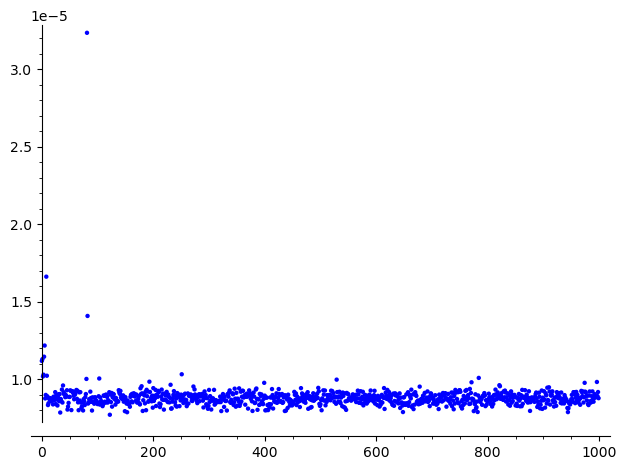

In [95]:
print("""\
# ****************************************************************************
#  PERFORMANCES DE RABIN-MILLER
# ****************************************************************************
""")

# Donnees de l'enonce de l'exercice

nmin=10
nmax=500
nbtests = 10

# Code pour l'EXERCICE

rep2 = "On a par exemple 15 et 21 qui sont souvent déclarés premiers alors que composés. On constate qu'ils sont en fait produits de deux nombres premiers distincts."
rep3 = "Il faut que 1/4^nbtests < 2^-50, c'est à dire qu'il faut faire au moins 25 tests pour assurer une probabilité d'erreur de au plus 2^-50"

# # Affichage des resultats

print(rep2)
print(rep3)
list_plot( [timeit( 'testRM(n)', number=20, repeat=3, seconds=true) for n in range(1001,1001+100000,100) ])


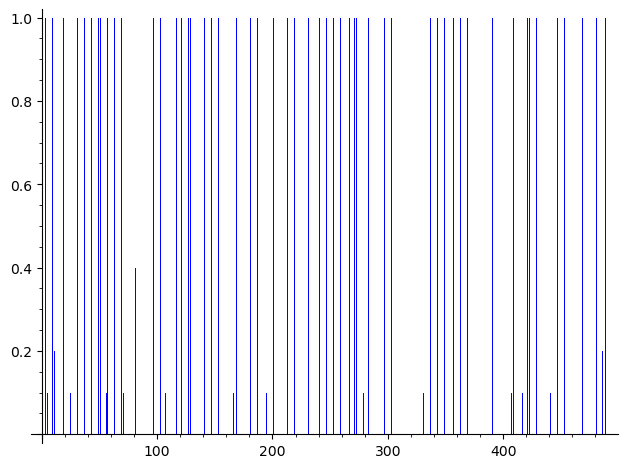

In [98]:
bar_chart( [1/nbtests * sum( [testRM(n) for i in range(nbtests)]) for n in range(nmin,nmax)])

In [99]:
reset()
print("""\
# ****************************************************************************
# TEST DE SOLOVAY-STRASSEN 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

n = 561

# Code pour l'EXERCICE

nmin=10
nmax=500
nbtests = 10

def testSS(n):
    if n%2 == 0 :
        return False
    a = randint(2,n-1)
    if gcd(a,n) > 1 : 
        return False
    g = a^((n-1)/2) %n
    if (jacobi_symbol(a,n)%n) == g :
        return True
    else :
        return False

rep3 = "On a par exemple 15, 25 et 27, qui sont là aussi produits de deux premiers (non distincts pour 25 par contre)"
rep4 = "Ici la probabilité de trouver un témoin de Solovay parmi les inversibles modulo n est d'au plus 1/2, donc il faut faire 50 tests pour assurer une probabilité de faux diagnostic inférieure à 2^-50"

# # Affichage des resultats

print("Test de la primalite de n=",n,"avec implementation de Solovay-Strassen")
print(testSS(n))
print(rep3)
print(rep4)

# ****************************************************************************
# TEST DE SOLOVAY-STRASSEN 
# ****************************************************************************

Test de la primalite de n= 561 avec implementation de Solovay-Strassen
False
On a par exemple 15, 25 et 27, qui sont là aussi produits de deux premiers (non distincts pour 25 par contre)
Ici la probabilité de trouver un témoin de Solovay parmi les inversibles modulo n est d'au plus 1/2, donc il faut faire 50 tests pour assurer une probabilité de faux diagnostic inférieure à 2^-50


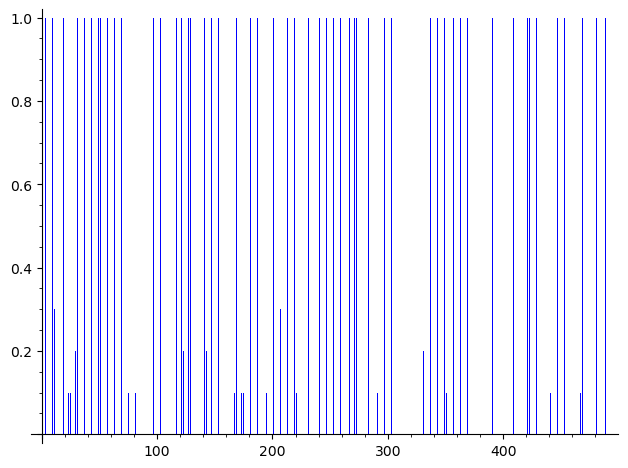

In [100]:
bar_chart( [1/nbtests * sum( [testSS(n) for i in range(nbtests)]) for n in range(nmin,nmax)])

In [102]:
print("""\
# ****************************************************************************
# COMPARAISON ENTRE LES TESTS DE R-M ET S-S 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

nmax=150

# Code pour l'EXERCICE

Temoins = []
for n in range(3,151) :
    if not ZZ(n).is_prime() and n%2 != 0:
        for a in range(2,n):
            if gcd(a,n) == 1:
                if (a^((n-1)/2) % n) == (jacobi_symbol(a,n)%n) : # on vérifie que ce n'est pas un témoin de SS
                    temoin_RM = True
                    m = n-1
                    v = 0
                    while m % 2 == 0 :
                        m = m/2
                        v+=1
                    b = a^m % n
                    if b == 1 :
                        temoin_RM = False
                    for i in range(0,v) :
                        if (b % n) == (-1%n):
                            temoin_RM = False
                        b = b^2 % n
                    if temoin_RM == True : 
                        Temoins.append((n,a))
                
# # Affichage des resultats

print("Liste d'entiers composés et de temoins exclusifs de Rabin-Miller")
print(Temoins)



reset()

# ****************************************************************************
# COMPARAISON ENTRE LES TESTS DE R-M ET S-S 
# ****************************************************************************

Liste d'entiers composés et de temoins exclusifs de Rabin-Miller
[(45, 19), (45, 26), (65, 14), (65, 51), (85, 16), (85, 69), (105, 8), (105, 13), (105, 41), (105, 64), (105, 92), (105, 97), (117, 53), (117, 64), (145, 59), (145, 86)]


In [18]:
print("""\
# ****************************************************************************
# TEST DE LUCAS
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice


# Code pour l'EXERCICE

def testL(n,p,q):
    if n == 2 :
        return True
    else :
        delta = p^2 - 4*q
        g = gcd(n,2*q*delta)
        if g > 1 and n > g :
            return False
        elif g == n :
            print("Mauvais choix de p, q")
            return None
        eps = n - jacobi_symbol(delta,n)
        m = eps
        t = 0
        while m%2==0 :
            m = m/2
            t+=1
        U = [0,1]
        for i in range(2,m+1) :
            U.append(p*U[i-1]-q*U[i-2])
        V = [2,p]
        for i in range(2,n+1) :
            V.append(p*V[i-1]-q*V[i-2])
        g = gcd(n,U[m])
        if g > 1 and n > g :
            return False
        elif g == n :
            return True
        for i in range(0,t) :
            g = gcd(n,V[(2^i)*m])
            if g > 1 and n > g :
                return False
            elif g == n :
                return True
        return False

# # Affichage des resultats

for _ in range(1):
    n =  ZZ.random_element(2,3)
    print(n.is_prime()==testL(n, 4, 9))

# ****************************************************************************
# TEST DE LUCAS
# ****************************************************************************

entrée Lucas
True


In [19]:
print("""\
# ****************************************************************************
# TEST DE BAILLIE, POMERANCE, SELFRIDGE ET WAGSTAFF
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

nmax=1000

# Code pour l'EXERCICE

def suite(k) :
    return (-1)^k*(2*k+5)

def testRabinMillnerAFixe(n,a) :
    m = n-1
    v = 0
    while m % 2 == 0 :
        m = m/2
        v+=1
    g = gcd(a,n)
    if g > 1 :
        return False
    b = pow(Mod(a,n),m)
    if b == 1 :
        return True
    for i in range(1,v+1) :
        if (b^2 % n) == 1:
            g = gcd(b+1,n)
            if g == 1 or  g == n :
                return True
            else :
                return False
        b = b^2 % n
    return False

def testBPSW(n):
    if n == 2 :
        return True
    else :
        if not testRabinMillnerAFixe(n,2) :
            return False
        k = 0
        delta = suite(k)
        while jacobi_symbol(delta,n) != - 1 :
            k+=1
            delta = suite(k)
        p, q= 1, (1-delta)/4
        if not testL(n,p,q) :
            return False
        return True

# # Affichage des resultats

print(all([ZZ(n).is_prime()==testBPSW(n) for n in range(2,nmax+1)]))



# ****************************************************************************
# TEST DE BAILLIE, POMERANCE, SELFRIDGE ET WAGSTAFF
# ****************************************************************************

entrée RM
entrée Lucas
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
e

entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée RM
entrée Lucas
entrée RM
entrée RM
entrée RM
True
